# Final Project: Designing a plagiarism detector
## Tianhui Xu

## Introduction

Plagiarism is considered as the one of the severe scientific misconduct. While it could happen in a lot of different forms like text, code or even graphs. In this project, I would focus on text-copying, especially in the context of essays where the text is in English and the length is between 500-100000 words. This program would allow users to input two documents, and the program would output a rate of similarity. 

This project consists of three parts:
1. Basic: String matching algorithm 
2. Compare and contrast two string matching algorithms
3. Describe the algorithm use in specific contexts and how it is useful for plagiarism detection

\#rightproblem: When given the initial formulation of the problem, I first characterized the problem in terms of the initial state, goal state, and scale. Therefore, I would make better design choices based on that. I also gave an overview of my proposed solutions.

### Overall Problem Formulation
Suppose each student submission is a string that is a result of concatenating all the words there (i.e., white spaces are
removed). Let X and Y be two student submission strings. Find all the common substrings of length k (known as
k-gram) of the two strings. In other words, determine all (i,j) where X[i:i+k]=Y[j:j+k].
For example, X="today is Monday", Y="day". All possible (i,j) from these two strings are (2,0) and (10,0) for k=3 (“day"
appears twice in X, and we disregard the white spaces).

#### Computational Solution

##### 1. Problem Characterization
The initial state of the problem is that we have two concatenated strings from texts, and the goal state is to find all common substrings of the given length. 

There are two relevant characteristics of the input strings that may impact our choice of solution: the lengths of strings would normally range from 800 to 100,000 words and the strings would contain both letters and numbers. 

There are two operations that need to be done in this problem. The first is to find all the patterns of length-k that exist in Y, and the second is to search for occurrences of those patterns in X.

##### 2. Definition of algorithm efficiency in this context
Before comparing any potential solutions, we will first define the algorithm efficiency in this context: run time and also the amount of space it needs. Because in the context of plagirism detection, we want a quick output of comparison results and the length of the paper requires a asymptotic analysis of the runtime. The need for space complexity analysis also stems from the fact that the length of the paper could be over 100,000 words.

Next, I'll explain why a combination of hash table and the rolling hashing algorithm would be the optimal solution for this problem. 

##### 3. Data structure choice
Hash table allows us to insert and search any data in $O(1)$ time, independent of the size of the hash table. It is definitely better in terms of runtime than other data structures like binary search trees that takes O(log(n)) time for searching and inserting. And since we don't need all those strings to be sorted, there's no need to implement a BST. And the advantage is especially obvious when the size of entry is large, which is also highly relevant in this case. The advantage corresponds perfectly with the two operations that need to be done, therefore minimizing the runtime. The thorough complexity analysis will be provided after the two implementations. 

Moreover, comparing strings to strings can be costly, with a runtime of $O(len(str))$. However, using hashing, we only need to compare hash value first and if the two hash values equal, we then compare the strings to determine whether they are truly the same, thus decreasing the runtime for comparison.

##### 4. Algorithm choice
A simple brute-force algorithm is to iterate over X to decide the number of occurrences of the length-k pattern, and a total runtime would be $O(len(x)-k+1)(len(y)-k+1)k$ to compare all patterns that exist in Y, which would be really slow as the length of the given paper scales. 

Rolling hashing algorithm takes the advantage even further by minimizing the time required for hashing (calculating where to store the length-k strings in X and Y), with detailed description in the design choice section for the first implementation below. 

While the second implementation doesn't enjoy the advantage of rolling hashing, I would justify the choice of hash function explain the feasibility of the approach.

Therefore, a combination of the data structure with the algorithm entails the best computational solution. 

\#ComputationalSolutions: Formulated and applied a hash table solution that solves the plagiarism detection problem. Justified and explained for the chosen data structure of hash table and the rolling hashing algorithm used. Contrasted the chosen data structure with binary trees to demonstrate its best fit for the problem through defined efficiency metrics. Also contrasted the chosen rolling hashing algorithm with the brutal-force approach to demonstrate its efficiency.

### First implementation
You will build the first implementation to solve the problem stated above. The algorithm is as follows:
- Store all length-k substrings of $X$ into a hash table $T_X$ with the hash values computed by using rolling
hashing.
- For each substring $s_y$ in $Y$, compute the hash value $h(s_y)$ using rolling hashing, and use this hash value to look up $s_y$ in table $T_X$. If the lookup is successful, then we have a common substring.

Using this algorithm, complete the function below. There is a lot to fill in as you write the code:
- You will need to specify q for the hash function a mod q in rolling hashing. However, do not worry about fine-tuning q—so long as you choose a prime number and provide a justification for why your chosen value of q makes sense with regards to the table size.
- Other design choices should be thoroughly justified, including but not limited to: the hash table’s size, data structures used, and any additional Python functions.
- No external libraries should be used, except for math, random, and numpy.

#### Design choices
##### 1. Rolling Hashing Algorithm

Rolling Hashing algorithm minimizes the time spent on hashing for each length-k strings that exist in X. It works as follows:  

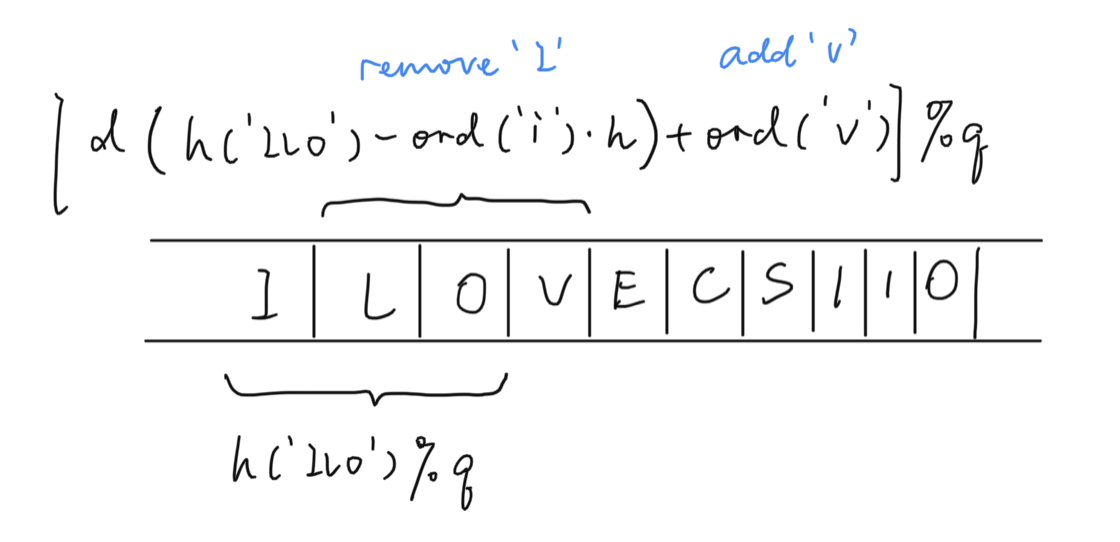

The parameters are defined as:
- d: Number of possible corresponding 'ord' numbers accroding to ASCII standard
- q: A prime number with the choice discussed below
- h: $d^{(m-1)} mod q$ 

We first calculate the hash value for the initial length-k string by $hash(text[0...k-1] by (ord(x[0]) + ord(x[1]) + ... + ord(x[k-1])) mod q$. 
And when we roll one digit to the right to determine the hash value, we calculate it by 
$hash(text[m+1 ... m+k]) = (d(hash(text[m ... m+k-1]) - text[m]*h + text[m+k]) mod q$
and so on and so forth. 


The complexity analysis for the entire algorithm will be provided after the two implementations.

##### 2. The choice of prime number q

The table size is at first determined by the prime value q chosen, and could potentially resize if provided with a resizing algorithm that ensures that the load factor never exceeds a threshold. 

The reason why q needs to be a prime value is to minimize the number of potential collisions as much as possible to minimize the run time, because since it is only divisable of 1 itself, modulo k will spread the hash value throughout the distribution. If given time, I would fine-tune q to ensure the minimum number of collisions. 

The total number of length-k strings that exists in X is $(len(X)-k+1)$, so the maximum number of slots needed is $(len(X)-k+1)$ if they all have different hash values. Therefore, we would choose a q which is 1.3 times larger than $(len(X)-k+1)$. Since we assumed that the maximum length of the given string is 100000, the prime number chosen could be 130003.

##### 3. Logic of the Entire Algorithm

The entire string matching algorithm works as follows as stated in the assignment instructions:
1. Store all length-k substrings of $X$ into a hash table $T_X$ with the hash values computed by using rolling
hashing.
2. For each substring $s_y$ in $Y$, compute the hash value $h(s_y)$ using rolling hashing, and use this hash value to look up $s_y$ in table $T_X$. If the lookup is successful, then we have a common substring. Store the substrings in lists of tuples for the final output.

##### 4. Helper Functions

A helper function preprocess(text) is defined to preprocess the string to exclude all the bad characters that we don't want to match for and also turn capital letters to lower cases.

### Second Implementation
You will now work on the second version of this algorithm:
- Store all length-k substrings of $X$ into a hash table $T_X$, using a hash function that does not entail the division method.
- For each substring $s_y$ in $Y$, compute the hash value $h(s_y)$ and use this hash value to look up $s_y$ in table $T_X$. If the lookup is successful, then we have a common substring.

Note that using a hash function that does not entail the division method prohibits the use of rolling hashing.
Asymptotically speaking, we are essentially taking more time for computing hash values in this version.

However, we are now free to choose a more fancy function, so there is a tradeoff here.

-  Reflect on what makes a good hash function. Run an experiment to give empirical evidence to support your choice for the hash function.
-  Implement the second version using the template below. Make sure to:
    - i. Justify any design choices (the hash function, the hash table’s size, the data structures used,and any additionally built Python function).
    - ii. Write clean and well-structured code, making use of PEP 8 coding conventions. Because this version only differs from the one in task 1 in how the hash values are computed, try to organize your code in a clear way that reutilizes as much functionality as the one you have already provided code for (for example, consider adding the hashing method either as a positional argument or as a method of choice if you wrap your code in a Python class).
    - iii. No external libraries should be used, except for the math, random, and numpy modules.

#### Justification for algorithm design

##### Good Hash Function

According to Cormen et al. (2019), good hash functions would satisfy the following characteristics generally:

1. The resulting hash table is uniformly distributed, with possible hash values corresponding to similar numbers of keys to minimize collisions as much as possible. Therefore, when doing search operation, we would spend the least time to search for the chains stored in each slots, ensuring a time complexity of $O(1)$.
2. The computation of the hash values does not have high time complexity. Because we need to implement the hash function for every possible key, so we need to keep the method simple to save running time.
3. The hash function should utilize every bits of the input so that similar keys could be hashed to different values, which minimzes collisions.

##### Multiplication Method
Since we are not allowed to use the division method, the multiplication method is used instead to compute hash values. The multiplication method works as follows according to Cormen et al. (2019): 

We multiply the key k by a constant A in the range 0 < A < 1 and keep the fractional part of kA. Then, we multiply this value by m and take the integer part of the result. The formula is represented by $h(k) = int[tablesize\times frac(kA)]$. 

In this case, the value A is chosen to be 0.618 which is proved to work best with this method.

Because the context is in string matching, so k is first calculated by a loop that iterates through the string 

##### The Chosen Hash Function

The chosen hash function satisfies all the above conditions that the hash values are calculated using all the digits, unique values are given to different input strings, and the computation does not take a lot of time. A more detailed experimental analysis on why the hash function is chosen will be provided after the code section.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
def preprocess(text):
    """
    Preprocess the input string to exclude all the bad characters and turn all the letters to lower case.
    Input:
    - text: string
    Output:
    - result: the processed string
    """
    # define all the bad characters that we want to exclude
    bad_chars = [';', ',', '.', '?', '!', '_', '[', ']', ':', '“', '”', '"', '-', '-', '(', ')','\n',' ','/','–','—',"’","‘"]
    
    # filter x to exclude the bad chars and the spaces
    filtered_text = filter(lambda i: i not in bad_chars, text)
    result = "".join(filtered_text)

    # transform x and y to lower case strings
    result = result.lower()
    
    return(result)

In [3]:
def rh_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    Input:
    - x, y: strings
    - k: int, length of substring
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """
    q = 130003 # set the prime number
    d = 128 # number of possible characters according to ASCII Codes
    Tx = [[] for i in range(q)] # hash table that stores all the hash values of x computed by using rolling hashing
    hx = 0 # hash value for each substring of x
    hy = 0 # hash value for each substring of y
    h = d ** (k - 1) % q
    output = []
        
    # store all length-k substrings of X into a hash table Tx with the hash values computed by using rolling hashing
    # calculate the hash value of the first window k in x
    for i in range(0,k):
        hx = (d * hx + ord(x[i])) % q
        strx = x[0:k]
    Tx[hx] = [[strx],[0]]
    
    # iterate over x to calculate hash value for every length-k words using rolling hashing
    for i in range(len(x)-k):
        # implement rolling hashing by substracting the first char and adding the last char
        hx = (d * (hx - ord(x[i]) * h) + ord(x[i + k])) % q
        strx = x[1+i:1+i+k]
        if Tx[hx] != []:
            Tx[hx][0].append(strx)
            Tx[hx][1].append(1+i)
        else:
            Tx[hx] = [[strx],[1+i]]
    
    # hash value of the first substring in y
    for i in range(0,k):
        hy = (d * hy + ord(y[i])) % q
        stry = y[0:k]
    
    if Tx[hy] != []:
        xidx = Tx[hy][1]
        for m in range(0,len(Tx[hy][0])):
            strx = Tx[hy][0][m]
            if stry == strx:
                output.append((Tx[hy][1][m],0))
                
    # for each substring sy in y, compute the hash value h(sy) using rolling hashing
    # use the hash value to look up sy in table Tx
    for i in range(len(y)-k):
        hy = (d * (hy - ord(y[i]) * h) + ord(y[i + k])) % q
        stry = y[1+i:1+i+k]
        if Tx[hy] != []:
            xidx = Tx[hy][1]
            for m in range(0,len(Tx[hy][0])):
                strx = Tx[hy][0][m]
                if stry == strx:
                    output.append((Tx[hy][1][m],1+i))

    return output

In [4]:
# hash function using multiplication method
def hsh_1(string,table_size):
    result = 0
    a = 0.618
    for char in string:
        result += result * 128 + ord(char)
    result = int(table_size * ((result * a) - int(result * a)))
    return result

In [5]:
def regular_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    NOT using rolling hashing on both strings.
    Input:
    - x, y: strings
    - k: int, length of substring
    Output:
    - A list of tuples (i, j)
    where x[i:i+k] = y[j:j+k]
    """
   
    table_size = int((len(x) - k + 1) * 1.3)
    hx = 0
    Tx = [[] for i in range(table_size)]
    loadfactor = 0
    output = []
    # Store all length-k substrings of 𝑋 into a hash table 𝑇𝑋, 
    # using a hash function that does not entail the division method.
    for i in range(len(x)-k+1):
        strx = x[i:i+k]
        hx = hsh_1(strx,table_size)
        if Tx[hx] != []:
            #Tx[hx] = [[Tx[hx][0][0],strx],[Tx[hx][1][0],i]]
            Tx[hx][0].append(strx)
            Tx[hx][1].append(i)
        else:
            Tx[hx] = [[strx],[i]]
        
    # For each substring  𝑠𝑦  in  𝑌 , compute the hash value  ℎ(𝑠𝑦)  
    # and use this hash value to look up  𝑠𝑦  in table 𝑇𝑋. 
    # If the lookup is successful, then we have a common substring.
    for i in range(len(y)-k+1):
        stry = y[i:i+k]
        hy = hsh_1(stry,table_size)
        if Tx[hy] != []:
            xidx = Tx[hy][1]
            for m in range(0,len(Tx[hy][0])):
                strx = Tx[hy][0][m]
                if stry == strx:
                    output.append((Tx[hy][1][m],i))

    return output


In [6]:
def get_match(x,y,k,method):
    """
    This function is user-faced which provides the users with a choice of choosing which hash functions to use. 
    and also helps to preprocess the input strings and provide error messages when the input is invalid.
    
    Input:
    - x, string
    - y, string
    - method, 'rh' or 'regular' to indicate hashing algorithm chosen
    
    Output:
    - function call
    """
    x = preprocess(x)
    y = preprocess(y)
    
    if k > len(x) or k > len(y):
        return("The input length k is too larger, please input one that is greater than 0 and smaller than or equal to "+str(min(len(x),len(y))))
 
    if method == 'regular':
        return regular_get_match(x,y,k)
    elif method == 'rh':
        return regular_get_match(x,y,k)

Demonstrate that your code works as expected by testing it with at least three, non-trivial test cases.

Three test cases are provided below to demonstrate that the code works as expected. The three test cases are explained below:
1. The first test case tests for case when there are multiple same sub-strings to see whether the output would include the indexes referring to all of them.
2. The second test case tests for cases when the given k is larger than the length of X or Y to see whether there is proper error messages outputed to warn the user.
3. The third test case tests for when the input string contains bad characters or capital letters that we don't want to match for and see whether there's pre-existing methods to exclude them.
4. The fourth test case ensures that the function could work for real papers.

In [7]:
# test case 1
x1 = 'ilovelovelovecs110'
y1 = 'ilove'
k1 = 3
print(get_match(x1,y1,k1,'regular'))
print(get_match(x1,y1,k1,'rh'))

[(0, 0), (1, 1), (5, 1), (9, 1), (2, 2), (6, 2), (10, 2)]
[(0, 0), (1, 1), (5, 1), (9, 1), (2, 2), (6, 2), (10, 2)]


In [8]:
# test case 2
x2 = 'ilovecs110'
y2 = 'ilove'
k2 = 30
print(get_match(x2,y2,k2,'regular'))
print(get_match(x2,y2,k2,'rh'))

The input length k is too larger, please input one that is greater than 0 and smaller than or equal to 5
The input length k is too larger, please input one that is greater than 0 and smaller than or equal to 5


In [9]:
# test case 3
x3 = 'Isee mountains'
y3 = 'I seeMountains'
k3 = 5
print(get_match(x3,y3,k3,'regular'))
print(get_match(x3,y3,k3,'rh'))

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8)]
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8)]


In [10]:
# test case 4
# test for how the algorithm works for real paper
paper1 = open("IGO.txt","r")

original_word = ""
for line in paper1:
    #line = filter(lambda i: i not in bad_chars, line)
    words = "".join(line)
    original_word += words
    
original_word_haha = original_word[1:5000]

In [11]:
paper2 = open("paper2.txt","r")
original_paper2 = ""
for line in paper2:
    words = "".join(line)
    original_paper2 += words

original_paper2_haha = original_paper2[1:5000]

In [12]:
k = 15
result_regular = get_match(original_word_haha,original_paper2_haha,k,'regular')
result_rh = get_match(original_word_haha,original_paper2_haha,k,'rh')
assert(result_regular == result_rh)
print(len(result_regular))

54


\#algorithms: The project used two algorithms along with data structures to solve the problem. I described how the solution works after implementing the two algorithms in code. I would also compared and contrasted two algorithms in terms of complexity analysis, how they engage with the data input, and how they tailor to our goal. Test cases are also provided to ensure accuracy.

#### Experiments on hash functions

Next, I'll run experiments to demonstrate the characteristics of the hash function chosen and how it's selected when compared with other potential hash functions.

Here, I utilize a randomization approach to input different lengths of randomly generated strings to test characteristics of the two hash functions. Though it's not like the setting of actual paper with patterns of words, the randomized strings could also provide us with an overview of how these hash functions behave asymptotically.

In [13]:
# hash function using multiplication method (1)
def hsh_1(string,table_size):
    result = 0
    a = 0.618
    for char in string:
        result += result * 128 + ord(char)
    result = int(table_size * ((result * a) - int(result * a)))
    return result

In [14]:
# hash function using multiplication method (2)
def hsh_2(string,table_size):
    result = 0
    a = 0.618
    for char in string:
        result += ord(char)
    result = int(table_size * ((result * a) - int(result * a)))
    return result

In [15]:
def generate_inputs(N, interval):
    '''
    This function is adapted from the code in activity for session 5.
    
    This function generates data of size 1..N.
    --------
    Inputs:
    -N: maximum size of input list
    -interval: interval of sizes for the elements on the list
    Outputs:
    -A list of lists to be tested
    '''
    letters='abcdefghijklmnopqrstuvwxyz123456789'
    data = []
    for i in range(0, N+1, interval):
        data.append([''.join(random.choice(letters) for k in range(i)),''.join(random.choice(letters) for k in range(i))])
    return data

In [16]:
def regular_get_match_compare(x, y, k, hash_function):
    """
    Adjusted function for the sake of comprison
    """
   
    table_size = int((len(x) - k + 1) * 1.3)
    hx = 0
    Tx = [[] for i in range(table_size)]
    loadfactor = 0
    output = []
    # Store all length-k substrings of 𝑋 into a hash table 𝑇𝑋, 
    # using a hash function that does not entail the division method.
    for i in range(len(x)-k+1):
        strx = x[i:i+k]
        hx = hash_function(strx,table_size)
        if Tx[hx] != []:
            #Tx[hx] = [[Tx[hx][0][0],strx],[Tx[hx][1][0],i]]
            Tx[hx][0].append(strx)
            Tx[hx][1].append(i)
        else:
            Tx[hx] = [[strx],[i]]
        
    # For each substring  𝑠𝑦  in  𝑌 , compute the hash value  ℎ(𝑠𝑦)  
    # and use this hash value to look up  𝑠𝑦  in table 𝑇𝑋. 
    # If the lookup is successful, then we have a common substring.
    for i in range(len(y)-k+1):
        stry = y[i:i+k]
        hy = hash_function(stry,table_size)
        if Tx[hy] != []:
            xidx = Tx[hy][1]
            for m in range(0,len(Tx[hy][0])):
                strx = Tx[hy][0][m]
                if stry == strx:
                    output.append((Tx[hy][1][m],i))
    
    return (output,Tx)


In [47]:
'''
Three helper functions that calculates metrics for comparisons
'''
# calculate the number of collisions
def num_collision(hash_table):
    num = 0
    for i in range(len(hash_table)):
        if hash_table[i] != []:
            if len(hash_table[i][1]) > 1:
                num += (len(hash_table[i][1]) - 1)
    return num


# calculate average number of elements in a bucket
def avg(hash_table):
    num = 0
    bucket = 0
    for i in range(len(hash_table)):
        # find the number of non-empty cells
        if hash_table[i] != []:
            bucket += 1
        # find the number of elements
            num += (len(hash_table[i][1]) - 1)
    return num/bucket

# produce a histogram of the distribution
def hist(hash_table,label):
    result = {}
    for i in range(len(hash_table)):
        if hash_table[i] == []:
              result[i] = 0
        else:
            result[i] = len(hash_table[i][1])
    plt.bar(result.keys(),result.values(),label=label)
    plt.show()

Runtime

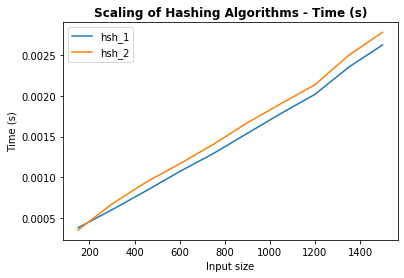

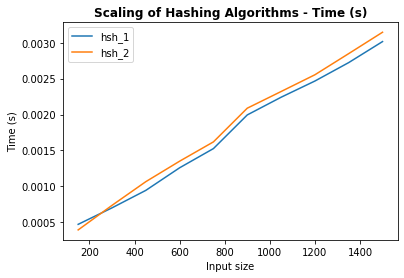

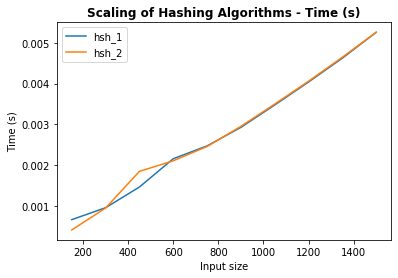

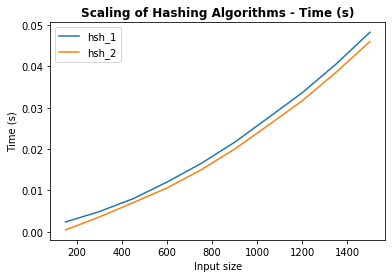

In [18]:
n_runs = 15
N = 1500
input_data_random = generate_inputs(N=N,interval=N//10)

def compare_hash_function_2(input_data,k):
    '''
    The code in this function is adapted from activity in Session 5.
    ----------
    This function compares the performance between three-way merge sort and bubble sort 
    in terms of running time.
    It produces a line plot to showcase their running time.
    ----------
    Input:
    - input_data: generated list of list of arrays to be sorted
    - input_type: a string indicating the type of input data
    Output:
    - None
    '''
    sorting_data = {}
    for ele in input_data[1:]:
        # iterative over the generated list of input data to document for the running time of both algorithms
        # results are stored in a dictionary with algorithm names and input size as keys
        if 'hsh_1' not in sorting_data.keys():
            sorting_data['hsh_1'] = {}
            sorting_data['hsh_1'][len(ele[0])] = {}
            temp_list = []
        for experiments in range(n_runs):
            start = time.time()
            el1 = ele.copy()
            regular_get_match_compare(el1[0],el1[1],k,hsh_1)
            temp_list.append(time.time() - start)
        sorting_data['hsh_1'][len(ele[0])] = np.mean(temp_list)
        if 'hsh_2' not in sorting_data.keys():
            sorting_data['hsh_2'] = {}
            sorting_data['hsh_2'][len(ele[0])] = {}
            temp_list = []
        for experiments in range(n_runs):
            start = time.time()
            el1 = ele.copy()
            regular_get_match_compare(el1[0],el1[1],k,hsh_2)
            temp_list.append(time.time() - start)
        sorting_data['hsh_2'][len(ele[0])] = np.mean(temp_list)
    
    for algo in sorting_data.keys():
        x_data = sorted(list(sorting_data[algo]))
        y_data = [(sorting_data[algo][x]) for x in x_data]
        ax = sns.lineplot(x_data, y_data, label=algo) 
        plt.xlabel('Input size')
        plt.ylabel('Time (s)')
        plt.legend(loc='upper left')
        plt.title('Scaling of Hashing Algorithms - Time (s)', fontweight='bold')
    plt.show()
    
    return None

# call the compare function
for k in (3,5,7,9):
    compare_hash_function_2(input_data_random,k)

Average number of elements in buckets

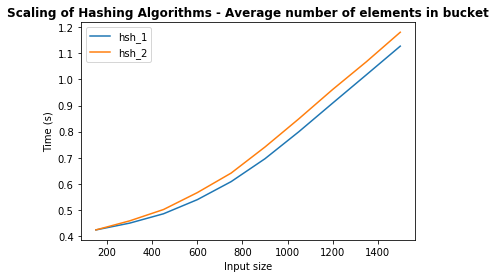

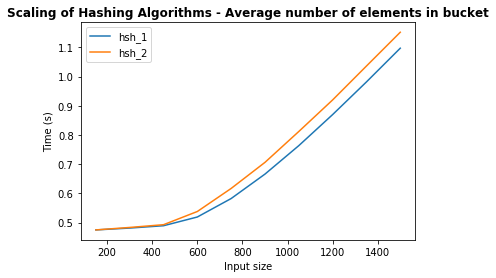

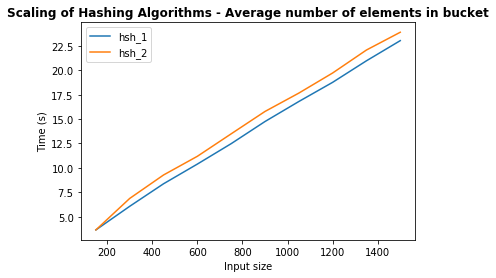

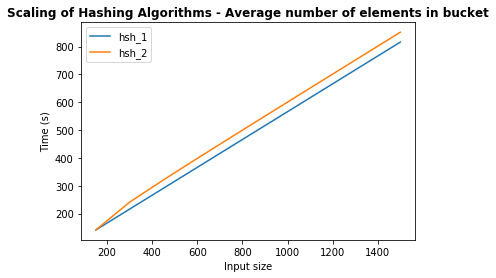

In [19]:
n_runs = 10
N = 1500
input_data_random = generate_inputs(N=N,interval=N//10)

def compare_hash_function_3(input_data,k):
    '''
    The code in this function is adapted from activity in Session 5.
    ----------
    This function compares the performance between three-way merge sort and bubble sort 
    in terms of running time.
    It produces a line plot to showcase their running time.
    ----------
    Input:
    - input_data: generated list of list of arrays to be sorted
    - input_type: a string indicating the type of input data
    Output:
    - None
    '''
    sorting_data = {}
    for ele in input_data[1:]:
        # iterative over the generated list of input data to document for the running time of both algorithms
        # results are stored in a dictionary with algorithm names and input size as keys
        if 'hsh_1' not in sorting_data.keys():
            sorting_data['hsh_1'] = {}
            sorting_data['hsh_1'][len(ele[0])] = {}
            temp_list = []
        for experiments in range(n_runs):
            el1 = ele.copy()
            output=regular_get_match_compare(el1[0],el1[1],k,hsh_1)[1]
            temp_list.append(avg(output))
        sorting_data['hsh_1'][len(ele[0])] = np.mean(temp_list)
        if 'hsh_2' not in sorting_data.keys():
            sorting_data['hsh_2'] = {}
            sorting_data['hsh_2'][len(ele[0])] = {}
            temp_list = []
        for experiments in range(n_runs):
            start = time.time()
            el1 = ele.copy()
            regular_get_match_compare(el1[0],el1[1],k,hsh_2)[1]
            temp_list.append(avg(output))
        sorting_data['hsh_2'][len(ele[0])] = np.mean(temp_list)
    
    for algo in sorting_data.keys():
        x_data = sorted(list(sorting_data[algo]))
        y_data = [(sorting_data[algo][x]) for x in x_data]
        ax = sns.lineplot(x_data, y_data, label=algo) 
        plt.xlabel('Input size')
        plt.ylabel('Time (s)')
        plt.legend(loc='upper left')
        plt.title('Scaling of Hashing Algorithms - Average number of elements in bucket', fontweight='bold')
    plt.show()
    
    return None

# call the compare function
for k in (3,5,7,9):
    compare_hash_function_3(input_data_random,k)

Number of collisions

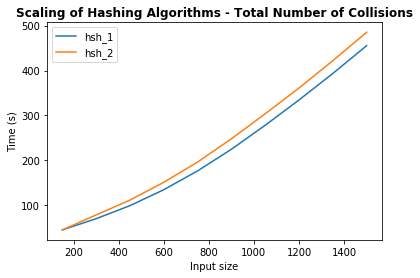

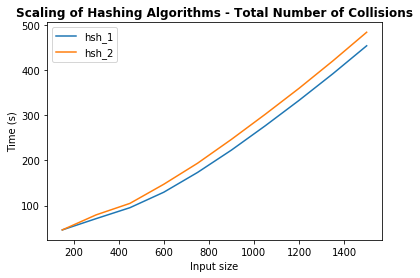

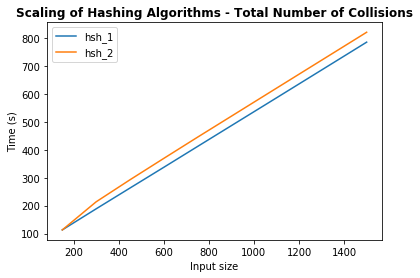

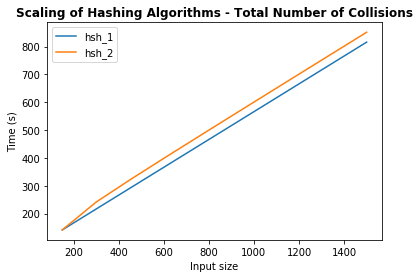

In [25]:
n_runs = 10
N = 1500
input_data_random = generate_inputs(N=N,interval=N//10)

def compare_hash_function_4(input_data,k):
    '''
    The code in this function is adapted from activity in Session 5.
    ----------
    This function compares the performance between three-way merge sort and bubble sort 
    in terms of running time.
    It produces a line plot to showcase their running time.
    ----------
    Input:
    - input_data: generated list of list of arrays to be sorted
    - input_type: a string indicating the type of input data
    Output:
    - None
    '''
    sorting_data = {}
    for ele in input_data[1:]:
        # iterative over the generated list of input data to document for the running time of both algorithms
        # results are stored in a dictionary with algorithm names and input size as keys
        if 'hsh_1' not in sorting_data.keys():
            sorting_data['hsh_1'] = {}
            sorting_data['hsh_1'][len(ele[0])] = {}
            temp_list = []
        for experiments in range(n_runs):
            el1 = ele.copy()
            output=regular_get_match_compare(el1[0],el1[1],k,hsh_1)[1]
            temp_list.append(num_collision(output))
        sorting_data['hsh_1'][len(ele[0])] = np.mean(temp_list)
        if 'hsh_2' not in sorting_data.keys():
            sorting_data['hsh_2'] = {}
            sorting_data['hsh_2'][len(ele[0])] = {}
            temp_list = []
        for experiments in range(n_runs):
            start = time.time()
            el1 = ele.copy()
            regular_get_match_compare(el1[0],el1[1],k,hsh_2)[1]
            temp_list.append(num_collision(output))
        sorting_data['hsh_2'][len(ele[0])] = np.mean(temp_list)
    
    for algo in sorting_data.keys():
        x_data = sorted(list(sorting_data[algo]))
        y_data = [(sorting_data[algo][x]) for x in x_data]
        ax = sns.lineplot(x_data, y_data, label=algo) 
        plt.xlabel('Input size')
        plt.ylabel('Time (s)')
        plt.legend(loc='upper left')
        plt.title('Scaling of Hashing Algorithms - Total Number of Collisions', fontweight='bold')
    plt.show()
    
    return None

# call the compare function
for k in (3,5,7,9):
    compare_hash_function_4(input_data_random,k)

Distribution of hash maps

When k equals 3
Hash map distribution plot for hsh_1


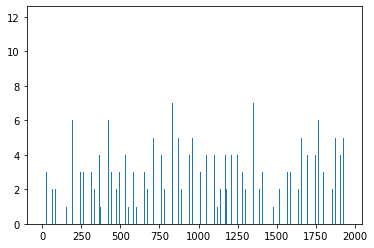

Hash map distribution plot for hsh_2


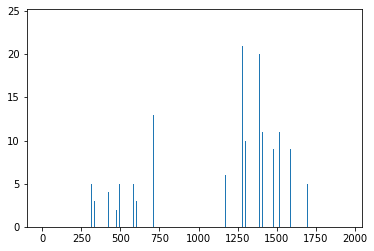

When k equals 5
Hash map distribution plot for hsh_1


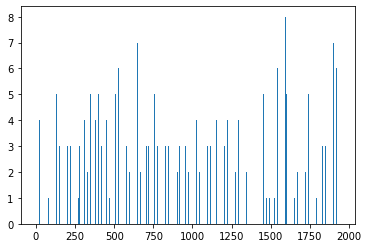

Hash map distribution plot for hsh_2


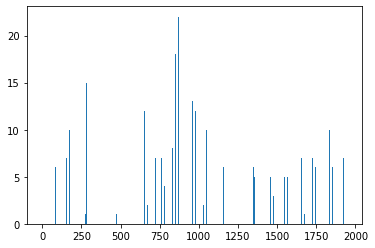

When k equals 7
Hash map distribution plot for hsh_1


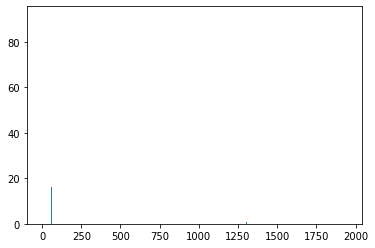

Hash map distribution plot for hsh_2


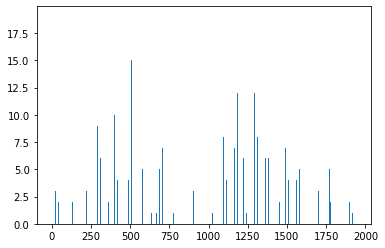

When k equals 9
Hash map distribution plot for hsh_1


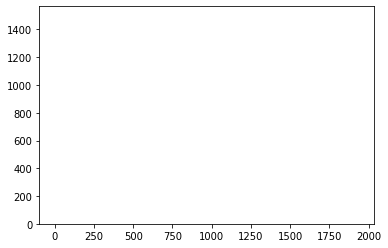

Hash map distribution plot for hsh_2


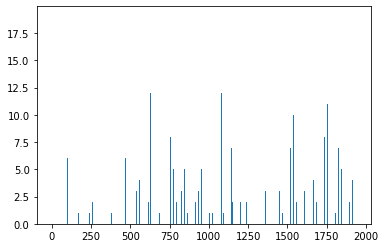

In [46]:
n_runs = 1
N = 1500
input_data_random = generate_inputs(N=N,interval=N//1)[1]

def compare_hash_function_4(input_data,k):
    '''
    The code in this function is adapted from activity in Session 5.
    ----------
    This function compares the performance between three-way merge sort and bubble sort 
    in terms of running time.
    It produces a line plot to showcase their running time.
    ----------
    Input:
    - input_data: generated list of list of arrays to be sorted
    - input_type: a string indicating the type of input data
    Output:
    - None
    '''
    for ele in input_data[1:]:
        # iterative over the generated list of input data to document for the running time of both algorithms
        # results are stored in a dictionary with algorithm names and input size as keys
        for experiments in range(n_runs):
            print('Hash map distribution plot for hsh_1')
            output=regular_get_match_compare(input_data_random[0],input_data_random[1],k,hsh_1)[1]
            hist(output,'hsh_1')
        for experiments in range(n_runs):
            print('Hash map distribution plot for hsh_2')
            output = regular_get_match_compare(input_data_random[0],input_data_random[1],k,hsh_2)[1]
            hist(output,'hsh_2')
    
    return None

# call the compare function
for k in (3,5,7,9):
    print("When k equals",k)
    compare_hash_function_4(input_data_random,k)

From the above experimental plots, we could conclude that the two hash functions behave the same in terms of runtime. For number of collisions and average number of elements in buckets, hash function 1 performs better. According to the distribution plot, the distribution for hash function 1 is quite uniform, indicating that it minimizes the number of collisions and therefore minimizing the runtime when conducting matching. So it satisfies the characteristics for good hash functions. Hash function 1 also good theoretically because it gives unique value for every string possible.

#dataviz: When analyzing the which hash function is better and how does it satisfies the characteristics, I visualized the experimental results in line plots, together with proper explanations, so that the audience could understand better. I also properly labeled the plots and chose different ones for different purposes.

Time complexity matters a lot in this context because when doing plagiarism detection, we wish to compare a paper to any possibly alike paper, so a small difference in runtime for each comparison would matter a lot.

In this section, I would discuss the time complexity of the two algorithmic version theoretically and experimentally.

##### Theoretical Complexity Analysis

1. There are two parts that constitute the first algorithm: iterating over the array x to calculate hash value for each length-k substring using rolling hashing, and store them in hash map Tx; and iterate over the array y to calculate hash value for each length-k substring using rolling hashing and search in the hash table for common ones.

    The first part takes an average runtime of $\Theta(len(x))$ because rolling hashing allows us to calculate hash value by simply deleting the first unit's value and adding the next unit's value when sliding through the array, so the runtime is proportional to the length of x. Inserting each string into the index corresponding with its hash value also takes $O(1)$ for each time, so the total time is $O(len(x))$.
    
    For the second part, iterating over the array y to calculate hash values takes a runtime of $\Theta(len(y))$. For searching each hash values in the hashtable Tx results in a worst-case when each hash value can find its pair in Tx and we need to compare string to string. In this case, the runtime would be $O((len(y)-k+1)k)$. In the best case, there's no match in x and y, so the best-case running time would be $\Theta(len(y)-k+1)$ since searching in hash tables only takes constant time.
    
    Combining the two parts, we get the asymptotic running time for the rolling hashing algorithm: $O(len(x)+len(y)k+len(y))$.
    
<br>
   
2. There are also two parts that constitute the second algorithm: iterating over the array x to calculate hash value for each length-k substring not using rolling hashing, and store them in hash map Tx; and iterate over the array y to calculate hash value for each length-k substring not using rolling hashing and search in the hash table for common ones.

    The first part takes and average runtime of $\Theta(len(x)k)$ because for each length-k substring, we need to re-calculate the value for each char. Inserting each string into the index corresponding with its hash value also takes $O(1)$ for each time, so the total time is $O(len(x)k$.
    
    For the second part, iterating over the array y to calculate hash values takes a runtime of $\Theta(len(y)k)$ for the same reason as for array x. For searching each hash value, it's the same with the first algorithm. 
    
    Combining the two parts, we get the asymptotic running time for the regular hashing algorithm: $O((len(x) + len(y)k)$. 
    
Comparing the asymptotic notations, we can see that the regular hashing takes more time than the rolling hashing one in the worst case, mostly caused by the efficiency in calculating hash values. And it would take even more time as k increases. 

But the worst case doesn't take into account the possible number of collisions each hash function causes in general. If we were to know that, we would be able to estimate the average runtime, which could be more precise for comparison.  

##### Experimental Complexity Analysis

Experimental analysis would not only give us a more direct sense of the runtime, but also test for different kinds of inputs for runtime, number of collisions, average number of elements in a bucket, and a distribution of the hash table.

I plan to do the following experiments to see the asymptotic behavior using the following metrics:
1. runtime 
2. numbers of collisions
3. distribution of elements in buckets

#ComplexityAnalysis: I used correct and appropriate notations for the complexity of the two algorithms and the computational solution as a whole. I also provided a justification for the choice and the result. In previous assignments, I misused the notations, I was extra careful this time.

#### Scaling behavior of the two algorithms' total number of collisions

In [60]:
N = 3000
input_data_random_2 = generate_inputs(N=N,interval=N//10)

In [61]:
def rh_get_match_compare(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    Input:
    - x, y: strings
    - k: int, length of substring
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """
    q = 130003 # set the prime number
    d = 128 # number of possible characters according to ASCII Codes
    Tx = [[] for i in range(q)] # hash table that stores all the hash values of x computed by using rolling hashing
    hx = 0 # hash value for each substring of x
    hy = 0 # hash value for each substring of y
    h = d ** (k - 1) % q
    output = []
        
    # store all length-k substrings of X into a hash table Tx with the hash values computed by using rolling hashing
    # calculate the hash value of the first window k in x
    for i in range(0,k):
        hx = (d * hx + ord(x[i])) % q
        strx = x[0:k]
    Tx[hx] = [[strx],[0]]
    
    # iterate over x to calculate hash value for every length-k words using rolling hashing
    for i in range(len(x)-k):
        # implement rolling hashing by substracting the first char and adding the last char
        hx = (d * (hx - ord(x[i]) * h) + ord(x[i + k])) % q
        strx = x[1+i:1+i+k]
        if Tx[hx] != []:
            Tx[hx][0].append(strx)
            Tx[hx][1].append(1+i)
        else:
            Tx[hx] = [[strx],[1+i]]
    
    # hash value of the first substring in y
    for i in range(0,k):
        hy = (d * hy + ord(y[i])) % q
        stry = y[0:k]
    
    if Tx[hy] != []:
        xidx = Tx[hy][1]
        for m in range(0,len(Tx[hy][0])):
            strx = Tx[hy][0][m]
            if stry == strx:
                output.append((Tx[hy][1][m],0))
                
    # for each substring sy in y, compute the hash value h(sy) using rolling hashing
    # use the hash value to look up sy in table Tx
    for i in range(len(y)-k):
        hy = (d * (hy - ord(y[i]) * h) + ord(y[i + k])) % q
        stry = y[1+i:1+i+k]
        if Tx[hy] != []:
            xidx = Tx[hy][1]
            for m in range(0,len(Tx[hy][0])):
                strx = Tx[hy][0][m]
                if stry == strx:
                    output.append((Tx[hy][1][m],1+i))

    return (output,Tx)

When the pattern length is 4


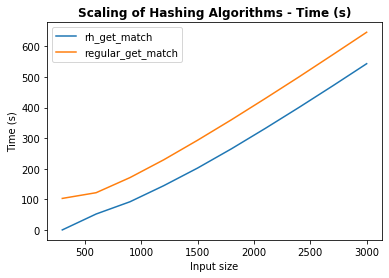

When the pattern length is 7


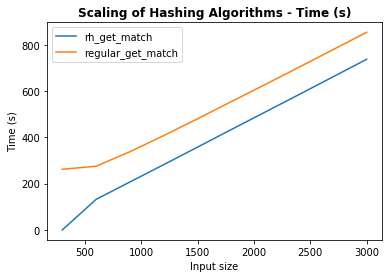

When the pattern length is 9


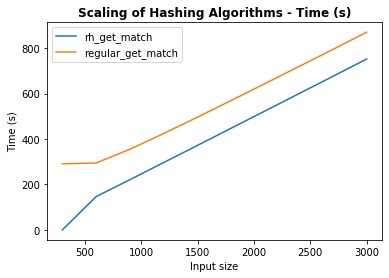

When the pattern length is 12


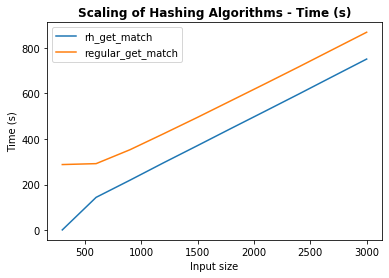

In [59]:
n_runs = 5

def compare(input_data,k):
    '''
    The code in this function is adapted from activity in Session 5.
    ----------
    This function compares the performance between the two hashing algorithms 
    in terms of running time.
    It produces a line plot to showcase their running time.
    ----------
    Input:
    - input_data: generated list of list of arrays to be sorted
    - k: the length-k substring that we wish to compare
    Output:
    - None
    '''
    hashing_data = {}
    for ele in input_data[1:]:
        # iterative over the generated list of input data to document for the running time of both algorithms
        # results are stored in a dictionary with algorithm names and input size as keys
        if 'rh_get_match' not in hashing_data.keys():
            hashing_data['rh_get_match'] = {}
            hashing_data['rh_get_match'][len(ele[0])] = {}
            temp_list = []
        for experiments in range(n_runs):
            el1 = ele.copy()
            output = rh_get_match_compare(el1[0],el1[1],k)[1]
            temp_list.append(num_collision(output))
        hashing_data['rh_get_match'][len(ele[0])] = np.mean(temp_list)
        if 'regular_get_match' not in hashing_data.keys():
            hashing_data['regular_get_match'] = {}
            hashing_data['regular_get_match'][len(ele[0])] = {}
            temp_list = []
        for experiments in range(n_runs):
            el1 = ele.copy()
            output = regular_get_match_compare(el1[0],el1[1],k,hsh_1)[1]
            temp_list.append(num_collision(output))
        hashing_data['regular_get_match'][len(ele[0])] = np.mean(temp_list)
    
    for algo in hashing_data.keys():
        x_data = sorted(list(hashing_data[algo]))
        y_data = [(hashing_data[algo][x]) for x in x_data]
        ax = sns.lineplot(x_data, y_data, label=algo) 
        plt.xlabel('Input size')
        plt.ylabel('Time (s)')
        plt.legend(loc='upper left')
        plt.title('Scaling of Hashing Algorithms - Time (s)', fontweight='bold')
    plt.show()
    return None

# call the compare function to all three kinds of datasets
for k in (4,7,9,12):
    print("When the pattern length is",k)
    compare(input_data_random,k)

From the above graph, we can conclude that for different ks, rolling hashing all have a smaller number of collisions compared to regular hashing, indicating a potential lower runtime.

#### Scaling behavior of the two algorithms with different values of 'k'

When the pattern length is 4


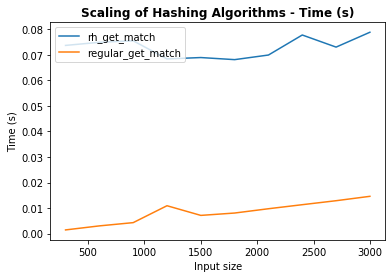

When the pattern length is 7


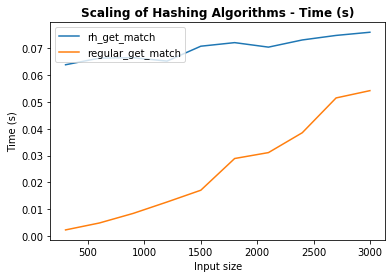

When the pattern length is 9


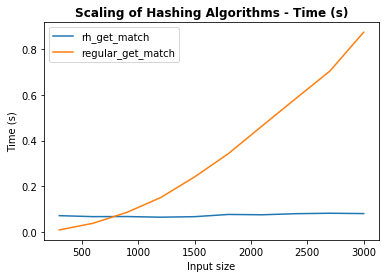

When the pattern length is 12


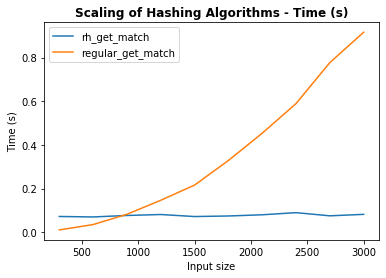

In [63]:
random.seed(123)
N = 3000
input_data_random = generate_inputs(N=N,interval=N//10)

n_runs = 5

def compare(input_data,k):
    '''
    The code in this function is adapted from activity in Session 5.
    ----------
    This function compares the performance between the two hashing algorithms 
    in terms of running time.
    It produces a line plot to showcase their running time.
    ----------
    Input:
    - input_data: generated list of list of arrays to be sorted
    - k: the length-k substring that we wish to compare
    Output:
    - None
    '''
    hashing_data = {}
    for ele in input_data[1:]:
        # iterative over the generated list of input data to document for the running time of both algorithms
        # results are stored in a dictionary with algorithm names and input size as keys
        if 'rh_get_match' not in hashing_data.keys():
            hashing_data['rh_get_match'] = {}
            hashing_data['rh_get_match'][len(ele[0])] = {}
        temp_list = []
        for experiments in range(n_runs):
            start = time.time()
            el1 = ele.copy()
            rh_get_match(el1[0],el1[1],k)
            temp_list.append(time.time() - start)
        hashing_data['rh_get_match'][len(ele[0])] = np.mean(temp_list)
        if 'regular_get_match' not in hashing_data.keys():
            hashing_data['regular_get_match'] = {}
            hashing_data['regular_get_match'][len(ele[0])] = {}
        temp_list = []
        for experiments in range(n_runs):
            start = time.time()
            el1 = ele.copy()
            regular_get_match(el1[0],el1[1],k,hsh_1)
            temp_list.append(time.time() - start)
        hashing_data['regular_get_match'][len(ele[0])] = np.mean(temp_list)
    
    for algo in hashing_data.keys():
        x_data = sorted(list(hashing_data[algo]))
        y_data = [(hashing_data[algo][x]) for x in x_data]
        ax = sns.lineplot(x_data, y_data, label=algo) 
        plt.xlabel('Input size')
        plt.ylabel('Time (s)')
        plt.legend(loc='upper left')
        plt.title('Scaling of Hashing Algorithms - Time (s)', fontweight='bold')
    plt.show()
    return None

# call the compare function to all three kinds of datasets
for k in (4,7,9,12):
    print("When the pattern length is",k)
    compare(input_data_random,k)

As the graphs show above, when the input size is 4 and 6, the rolling hashing algorithm performs much worse than the regular hashing algorithm because it's harder to calculate values using the rolling hashing method and its advantage of sliding through the array has not been demonstrated. But starting from around k = 7, the running time of regular hashing start scaling up, while the rolling hashing remains roughly constant. And the two bottom graphs show that the pattern became stable that when k is exceeds 9. In these cases, when input size is smaller than 1000, regular_get_match performs better, while when input size is larger than 1000, rolling hashing performs better. 

Therefore, in practical usages, we could decide which algorithm to use based on the length of paper and the length of string we want to find. But normally when we are deciding for plagiarism, we want to compare whether the consecutive three words are the same. And since the length of three English words are most likely larger than 9 and academic papers are most likely to have a length larger than 1000, the rolling hashing algorithm may be chosen more often.

\#ComputationalCritique: For the two algorithmic approaches, I did space complexity analysis for each algorithm and situate that in the given context using justified metrics. I also suggested better algorithms in different contexts. In previous assignments, I didn't use the correct metrics, this time I justified for the choice.

#### Carefully describe how you would use the code above to investigate the extent of plagiarism. Enumerate potential pitfalls and challenges of applying this algorithm for real-life use. Make sure you justify all the assumptions you make.

Approach:
1. To prepare for real word usages, we would ensure that the users could input papers instead of clean strings to provide them with the most convenience. For example, we could write preprocess function like the one below .

In [62]:
def preprocess(text):
    """
    Preprocess the input string to exclude all the bad characters and turn all the letters to lower case.
    Input:
    - text: string
    Output:
    - result: the processed string
    """
    # define all the bad characters that we want to exclude
    bad_chars = [';', ',', '.', '?', '!', '_', '[', ']', ':', '“', '”', '"', '-', '-', '(', ')','\n',' ','/','–','—',"’","‘"]
    
    if type(text) == str:
        # filter x and y to exclude the bad chars and the spaces
        filtered_text = filter(lambda i: i not in bad_chars, text)
        result = "".join(filtered_text)
    
    else:
        result = ""
        for line in text:
            line = filter(lambda i: i not in bad_chars, line)
            words = "".join(line)
        result += words

    # transform x and y to lower case strings
    result = result.lower()
    
    
    return(result)

2. Examining the fourth test case above, I found out that there are common matches for words like 'International Organization' which appear very often in both texts not because of plagiarism but because of topics. In real-world scenarios, we need to account for those cases. If given more time, I would compare the result after excluding common words and terminologies and analyze the accuracy of the algorithms.
3. Further experiments are needed to fine-tune k and decide comparing what length of strings serves best for the sake of plagiarism detection.